In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Dhaka Rent.xlsx')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.head(2)

,area,rent
0,2000,31500
1,2100,35000


In [5]:
df.tail(3)

,area,rent
57,1800,25100
58,2200,31560
59,3100,51600


In [6]:
df2 = pd.read_csv('Dhaka Rent.csv')

In [7]:
df2.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [8]:
df.shape

(60, 2)

In [9]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [10]:
#df.isnull()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


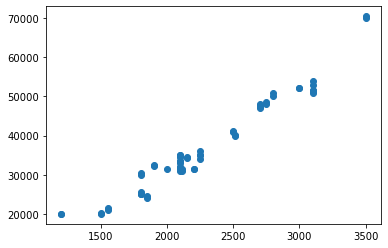

In [12]:
plt.scatter(df.area, df.rent)

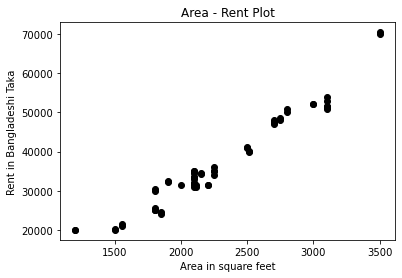

In [13]:
plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

In [14]:
df.area.mean()

2289.0

In [15]:
df.rent.mean()

37269.166666666664

In [16]:
x = df[['area']] # x = df.drop('rent', axis=1)

In [17]:
y = df[['rent']] # y = df.drop('area', axis=1)

In [18]:
y.head() #

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [19]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [20]:
!pip install sklearn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression() # creating object for linear regression 

In [23]:
reg.fit(x,y) # training the maodel

LinearRegression()

In [24]:
reg.coef_ #m

array([[21.29266147]])

In [25]:
reg.intercept_ #c

array([-11469.73544643])

In [26]:
reg.predict([[4000]])

C:\Users\Study Mart\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[73700.91044802]])

In [27]:
reg.predict([[3000]])

C:\Users\Study Mart\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[52408.2489744]])

In [28]:
52408.2489744-52100

308.2489743999977

In [29]:
#y = m*x+c
result = ((reg.coef_) * 3000) + (reg.intercept_)
result

array([[52408.2489744]])

In [30]:
reg.predict(x)

array([[31115.58750079],
       [33244.85364815],
       [41761.9182376 ],
       [36438.7528692 ],
       [52408.2489744 ],
       [28986.32135343],
       [20469.25676399],
       [27921.68827975],
       [46020.45053232],
       [33244.85364815],
       [34309.48672183],
       [33244.85364815],
       [33244.85364815],
       [41974.84485233],
       [36438.7528692 ],
       [54537.51512177],
       [26857.05520607],
       [21533.88983767],
       [26857.05520607],
       [46020.45053232],
       [33457.78026289],
       [33244.85364815],
       [63054.57971121],
       [14081.4583219 ],
       [48149.71667968],
       [54537.51512177],
       [47085.083606  ],
       [26857.05520607],
       [35374.11979552],
       [54537.51512177],
       [33244.85364815],
       [33244.85364815],
       [41761.9182376 ],
       [36438.7528692 ],
       [52408.2489744 ],
       [28986.32135343],
       [20469.25676399],
       [27921.68827975],
       [46020.45053232],
       [33244.85364815],


In [31]:
df['predicted_rent'] = reg.predict(x)

In [32]:
df.head()

,area,rent,predicted_rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [33]:
reg.predict([[5500]])

C:\Users\Study Mart\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[105639.90265843]])

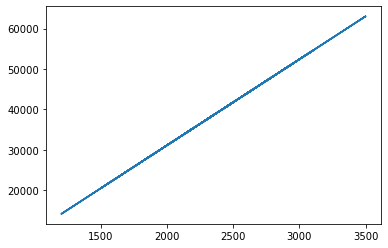

In [34]:
plt.plot(df.area, reg.predict(x))

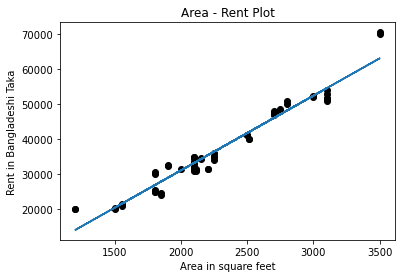

In [35]:
plt.plot(df.area, reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

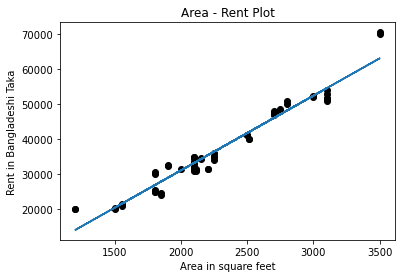

In [36]:
plt.plot(df.area.squeeze(), reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

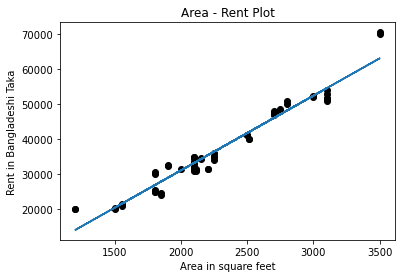

In [37]:
plt.plot(df.area.squeeze(), reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

In [38]:
reg.score(x,y) # training sccuracy

0.950249380357677

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
# actual - predicted
mean_squared_error(df[['rent']], reg.predict(df[['area']]))

6778077.204095561

In [41]:
mean_squared_error(y, df.predicted_rent)

6778077.204095561

In [42]:
mean_absolute_error(y, df.predicted_rent)

2009.8695093576282

In [43]:
import warnings as wr
wr.filterwarnings('ignore')

In [44]:
reg.predict([[5500]])

array([[105639.90265843]])